# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Price comparison for hotels in Northeast Brazil

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Observations and Discussion](#observation)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Two Brazilian cities were ranked in a ranking that honored the destinations that are highest among tourists in 2013. Fortaleza, in Ceará, and João Pessoa, in Paraíba, were among the 54 places in the world that had more positive opinions and increased in interest throughout the year according to TripAdvisor users.

Both cities are located in the Northeast region of Brazil.

Fortaleza has 313,140 km ² of area and 2,643,247 inhabitants estimated in 2018, in addition to the greater population density among the capitals of the country, and it is also the largest city of Ceará in population and the fifth in Brazil.

João Pessoa is a Brazilian municipality, capital and main financial and economic center of the state of Paraíba. With a population of 800,323 inhabitants estimated in 2018, the capital of Paraíba is the eighth most populous city in the Northeast Region and the 23rd in Brazil, being in its state the most populous municipality.

As shown in the TripAdvisor ranking these two cities have a very strong tourist potential. Thinking as a tourist, in general, we want to stay in a place close to sights and we also want to pay a fair price for the accommodation.

When we consider this problem, we can create a graphical map informing the values of the hotels and group them near the best places to visit in the cities. In addition, we can also compare the two Brazilian capitals by analyzing the cost of lodging and the tourist sites according to the city guide of Foursquare.

## Data <a name="data"></a>

As both capitals have several neighborhoods, I decided to pick up the major neighborhoods to compare hotel prices.

For Fortaleza city I selected the following neighborhoods: Praia de Iracema, Meireles, Mucuripe, Praia do Futuro and Downtown.

For city of João Pessoa I selected: Manaíra, Tambaú, Cabo Branco, Bessa and Downtown.

I'll also use OpenStreetMap with Nominatim, google maps data to manually collect hotel values and the foursquare API for finding venues in both capitals.

In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize

df = pd.DataFrame(columns=['City', 'Neighborhood', 'Latitude', 'Longitude', 'Lowest Price', 'Highest Price'])

In [2]:
from geopy.geocoders import Nominatim 
geolocator = Nominatim(user_agent="foursquare_agent")

In [3]:
locationJP = geolocator.geocode('João Pessoa')
locationTambau = geolocator.geocode('João Pessoa, Tambaú')
locationBessa = geolocator.geocode('João Pessoa, Bessa')
locationManaira = geolocator.geocode('João Pessoa, Manaíra')
locationCaboBranco = geolocator.geocode('João Pessoa, Cabo Branco')
locationDowntown = geolocator.geocode('João Pessoa, Centro')

locationFortal = geolocator.geocode('Fortaleza, CE')
locationIracema = geolocator.geocode('Fortaleza, CE, Praia de Iracema')
locationMeireles = geolocator.geocode('Fortaleza, CE, Meireles')
locationMucuripe = geolocator.geocode('Fortaleza, CE, Mucuripe')
locationFuturo = geolocator.geocode('Fortaleza, CE, Praia do Futuro')
locationForDowntown = geolocator.geocode('Fortaleza, CE, Centro')

In [4]:
df = df.append({ 'City'    : 'João Pessoa', 
            'Neighborhood' : 'Tambaú', 
            'Latitude'     : locationTambau.latitude,
            'Longitude'    : locationTambau.longitude,
            'Lowest Price' : 90, #Tambaú Hostel
            'Highest Price': 392 #Hotel Nord Luxxor Tambaú   
          }, ignore_index=True)  

df = df.append({ 'City'    : 'João Pessoa', 
            'Neighborhood' : 'Bessa', 
            'Latitude'     : locationBessa.latitude,
            'Longitude'    : locationBessa.longitude,
            'Lowest Price' : 76, #Hostel Casa dos Girassóis
            'Highest Price': 204 #Bessa Beach Hotel                 
          }, ignore_index=True)  

df = df.append({ 'City'    : 'João Pessoa', 
            'Neighborhood' : 'Manaíra', 
            'Latitude'     : locationManaira.latitude,
            'Longitude'    : locationManaira.longitude,
            'Lowest Price' : 90, #Manaíra Hostel
            'Highest Price': 535 #LS Hotel                       
          }, ignore_index=True)  

df = df.append({ 'City'    : 'João Pessoa', 
            'Neighborhood' : 'Cabo Branco', 
            'Latitude'     : locationCaboBranco.latitude,
            'Longitude'    : locationCaboBranco.longitude,
            'Lowest Price' : 113, #Hostel Sol E Mar PB
            'Highest Price': 260 #Hotel Cabo Branco Atlântico                  
          }, ignore_index=True)  

df = df.append({ 'City'    : 'João Pessoa', 
            'Neighborhood' : 'Downtown', 
            'Latitude'     : locationDowntown.latitude,
            'Longitude'    : locationDowntown.longitude,
            'Lowest Price' : 70, #Hotel Paradiso
            'Highest Price': 137 #Lagoa Park Hotel                  
                
          }, ignore_index=True)  

df = df.append({ 'City'    : 'Fortaleza', 
            'Neighborhood' : 'Praia de Iracema', 
            'Latitude'     : locationIracema.latitude,
            'Longitude'    : locationIracema.longitude,
            'Lowest Price' : 50, #Iracema Hostel
            'Highest Price': 300 #Hotel Sonata de Iracema                                
          }, ignore_index=True)  

df = df.append({ 'City'    : 'Fortaleza', 
            'Neighborhood' : 'Meireles', 
            'Latitude'     : locationMeireles.latitude,
            'Longitude'    : locationMeireles.longitude,
            'Lowest Price' : 130, #Hotel Itália Beach Fortaleza
            'Highest Price': 262 #Luzeiros Hotel                   
          }, ignore_index=True)  

df = df.append({ 'City'    : 'Fortaleza', 
            'Neighborhood' : 'Mucuripe', 
            'Latitude'     : locationMucuripe.latitude,
            'Longitude'    : locationMucuripe.longitude,
            'Lowest Price' : 95, #POUSADA ENCANTUS
            'Highest Price': 470 #Hotel Gran Marquise             
          }, ignore_index=True)  

df = df.append({ 'City'    : 'Fortaleza', 
            'Neighborhood' : 'Praia do Futuro', 
            'Latitude'     : locationFuturo.latitude,
            'Longitude'    : locationFuturo.longitude,
            'Lowest Price' : 50, #Costa azul Fortaleza
            'Highest Price': 314 #Crocobeach Hotel                      
                
          }, ignore_index=True)  

df = df.append({ 'City'    : 'Fortaleza', 
            'Neighborhood' : 'Downtown', 
            'Latitude'     : locationForDowntown.latitude,
            'Longitude'    : locationForDowntown.longitude,
            'Lowest Price' : 69, #Pousada Carnaúba
            'Highest Price': 147 #Nordeste Palace Hotel              
          }, ignore_index=True)  

In [5]:
df

,City,Neighborhood,Latitude,Longitude,Lowest Price,Highest Price
0,João Pessoa,Tambaú,-7.115343,-34.825746,90,392
1,João Pessoa,Bessa,-7.067367,-34.843179,76,204
2,João Pessoa,Manaíra,-7.104979,-34.834460,90,535
3,João Pessoa,Cabo Branco,-7.135341,-34.819697,113,260
4,João Pessoa,Downtown,-7.120198,-34.884492,70,137
5,Fortaleza,Praia de Iracema,-3.720798,-38.515628,50,300
6,Fortaleza,Meireles,-3.727822,-38.500372,130,262
7,Fortaleza,Mucuripe,-3.725706,-38.484802,95,470
8,Fortaleza,Praia do Futuro,-3.742535,-38.456245,50,314
9,Fortaleza,Downtown,-3.728129,-38.527412,69,147


Let's visualize the Neighborhoods we have so far

In [6]:
import folium # map rendering library

In [7]:
dfJP = df.loc[df['City']  == 'João Pessoa'].reset_index(drop=True)

In [8]:
map_jp = folium.Map(location=[locationJP.latitude, locationJP.longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfJP['Latitude'], dfJP['Longitude'], dfJP['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_jp)  
    
map_jp

In [9]:
dfFortal = df.loc[df['City']  == 'Fortaleza'].reset_index(drop=True)

In [10]:
map_fortal = folium.Map(location=[locationFortal.latitude, locationFortal.longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dfFortal['Latitude'], dfFortal['Longitude'], dfFortal['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_fortal)  
    
map_fortal

### Foursquare
Now that we have our location candidates, let's use Foursquare API to get info on venues in each neighborhood.

We will check the amount of bars, restaurants, theaters, steakhouse, coffee shop and malls in each neighborhood.

In [11]:
CLIENT_ID = '4QDE4CQ4F5SGJB2T2D4HY5CTVI1AECBF5JANQZ2EGUDMLXV3' # your Foursquare ID
CLIENT_SECRET = 'MM1DJ0WYF1T35LT1R1RJTA340F1NKE2SU5UCPUF2DXVZIZFZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200
radius = 2500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4QDE4CQ4F5SGJB2T2D4HY5CTVI1AECBF5JANQZ2EGUDMLXV3
CLIENT_SECRET:MM1DJ0WYF1T35LT1R1RJTA340F1NKE2SU5UCPUF2DXVZIZFZ


In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

def get_venues(location):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        location.latitude, 
        location.longitude, 
        radius, 
        LIMIT)    

    results = requests.get(url).json()
    venues = results['response']['groups'][0]['items']

    nearby_venues = json_normalize(venues) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    nearby_venues =nearby_venues.loc[:, filtered_columns]

    # filter the category for each row
    nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

    # clean columns
    nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]    
    return nearby_venues

In [13]:
#define columns to store number of venues
df['Bar'] = 0
df['Restaurant'] = 0
df['Theater'] = 0
df['Mall'] = 0
df['Steakhouse'] = 0
df['Coffee'] = 0

In [14]:
dfAux = get_venues(locationTambau)

df.loc[df['Neighborhood']  == 'Tambaú', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Tambaú', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationBessa)

df.loc[df['Neighborhood']  == 'Bessa', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Bessa', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationManaira)

df.loc[df['Neighborhood']  == 'Manaíra', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Manaíra', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationCaboBranco)

df.loc[df['Neighborhood']  == 'Cabo Branco', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Cabo Branco', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationDowntown)

df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'João Pessoa'), 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationIracema)

df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Praia de Iracema', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationMeireles)

df.loc[df['Neighborhood']  == 'Meireles', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Meireles', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationMucuripe)

df.loc[df['Neighborhood']  == 'Mucuripe', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Mucuripe', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationFuturo)

df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[df['Neighborhood']  == 'Praia do Futuro', 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

dfAux = dfAux.iloc[0:0]
dfAux = get_venues(locationForDowntown)

df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Bar'] = dfAux.query('categories.str.contains("Bar")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Bar'] += dfAux.query('categories.str.contains("Pub")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Restaurant'] = dfAux.query('categories.str.contains("Restaurant")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Theater'] = dfAux.query('categories.str.contains("Theater")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Mall'] = dfAux.query('categories.str.contains("Mall")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Steakhouse'] = dfAux.query('categories.str.contains("Steakhouse")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Steakhouse'] += dfAux.query('categories.str.contains("Churrascaria")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Coffee'] = dfAux.query('categories.str.contains("Cafe")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Coffee'] += dfAux.query('categories.str.contains("Café")').count()[0]
df.loc[(df['Neighborhood']  == 'Downtown') & (df['City']  == 'Fortaleza'), 'Coffee'] += dfAux.query('categories.str.contains("Coffee")').count()[0]

In [15]:
df

,City,Neighborhood,Latitude,Longitude,Lowest Price,Highest Price,Bar,Restaurant,Theater,Mall,Steakhouse,Coffee
0,João Pessoa,Tambaú,-7.115343,-34.825746,90,392,8,30,1,0,2,6
1,João Pessoa,Bessa,-7.067367,-34.843179,76,204,7,7,0,0,0,1
2,João Pessoa,Manaíra,-7.104979,-34.834460,90,535,8,23,2,2,2,4
3,João Pessoa,Cabo Branco,-7.135341,-34.819697,113,260,10,19,1,1,3,3
4,João Pessoa,Downtown,-7.120198,-34.884492,70,137,7,16,3,0,0,4
5,Fortaleza,Praia de Iracema,-3.720798,-38.515628,50,300,9,22,4,0,2,6
6,Fortaleza,Meireles,-3.727822,-38.500372,130,262,6,26,0,2,4,5
7,Fortaleza,Mucuripe,-3.725706,-38.484802,95,470,4,31,0,1,4,1
8,Fortaleza,Praia do Futuro,-3.742535,-38.456245,50,314,10,18,4,2,3,2
9,Fortaleza,Downtown,-3.728129,-38.527412,69,147,9,18,5,0,1,3


## Methodology <a name="methodology"></a>

In this project, we will direct our efforts to find the best place to stay in the cities of João Pessoa and Fortaleza.
In the first step, we collect the required hotel location and price data using google map data manually. We also identified the quantity and bars, restaurants, theaters, steakhouse, malls and coffes.

The second step will be the creation of two new features with the average price of hotels and a score of neighborhoods considering the number of locations found through the foursquare API.

The third and last step is to use the K-Means algorithm to perform automatic grouping by similarity, and we will create 3 clusters that will be presented and analyzed next.

## Results <a name="results"></a>

Let us now group the neighborhoods by value of lodging and good location based on the places found in foursquare. 

These clusters are the end result of our analysis.

In [16]:
df['M-price']=(df['Lowest Price']+df['Highest Price'])/2
df['N-venue']=df['Bar']+df['Restaurant']+df['Theater']+df['Mall']+df['Steakhouse']+df['Coffee']

In [ ]:
df

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [18]:
X = pd.DataFrame(df[['M-price', 'N-venue']].values)

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
X_clustered = kmeans.fit_predict(X)

df['clusterNumber'] = X_clustered

In [22]:
df

,City,Neighborhood,Latitude,Longitude,Lowest Price,Highest Price,Bar,Restaurant,Theater,Mall,Steakhouse,Coffee,M-price,N-venue,clusterNumber
0,João Pessoa,Tambaú,-7.115343,-34.825746,90,392,8,30,1,0,2,6,241,47,1
1,João Pessoa,Bessa,-7.067367,-34.843179,76,204,7,7,0,0,0,1,140,15,2
2,João Pessoa,Manaíra,-7.104979,-34.834460,90,535,8,23,2,2,2,4,312.5,41,1
3,João Pessoa,Cabo Branco,-7.135341,-34.819697,113,260,10,19,1,1,3,3,186.5,37,0
4,João Pessoa,Downtown,-7.120198,-34.884492,70,137,7,16,3,0,0,4,103.5,30,2
5,Fortaleza,Praia de Iracema,-3.720798,-38.515628,50,300,9,22,4,0,2,6,175,43,0
6,Fortaleza,Meireles,-3.727822,-38.500372,130,262,6,26,0,2,4,5,196,43,0
7,Fortaleza,Mucuripe,-3.725706,-38.484802,95,470,4,31,0,1,4,1,282.5,41,1
8,Fortaleza,Praia do Futuro,-3.742535,-38.456245,50,314,10,18,4,2,3,2,182,39,0
9,Fortaleza,Downtown,-3.728129,-38.527412,69,147,9,18,5,0,1,3,108,36,2


Let us see the scatter plot of the classified groups.

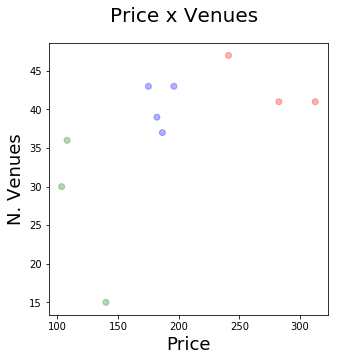

In [25]:
LABEL_COLOR_MAP = {0 : 'blue', 1 : 'red', 2: 'green'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

c1 = 0 
c2 = 1
labels = ['Price', 'N. Venues']
c1label = labels[c1]
c2label = labels[c2]
title = 'Price x Venues'

plt.figure(figsize = (5,5))
plt.scatter(X.iloc[:, c1],X.iloc[:, c2], c=label_color, alpha=0.3) 
plt.xlabel(c1label, fontsize=18)
plt.ylabel(c2label, fontsize=18)
plt.suptitle(title, fontsize=20)
plt.savefig(title + '.jpg')
plt.show()

## Observations and Discussion <a name="observation"></a>

Our analysis shows which local neighborhoods are the best neighborhoods of the two Brazilian Northeast cities. In addition, after the classification we noticed that both cities downtowns had been embedded in the same cluster, demonstrating that the algorithm did a good classification of the data.

## Conclusion <a name="conclusion"></a>